In [26]:

# Notes from week 1 of Deeplearning.ai Convolutional neural networks course


import numpy as np
from scipy import misc, signal  
import matplotlib.pyplot as plt


In [8]:
# if you have more params (weights) to train then need more data to avoid overfitting


# edge detection might detect vertical and horizontal edges separately

# convolutions: "convolve" input matrix by smaller matrix, eg: 6x6 input and 3x3 smaller
# take first 3x3 top left of 6x6 input, multiply element-wise by 3x3 matrix, and sum all results to get 
# output, which becomes the top-left value in output matrix of dimensions 4x4

# for vertical edge detected, the 3x3 matrix is:
print(np.array([1, 1, 1, 0, 0, 0, -1, -1, -1]).reshape(3, 3).T)
# convolving by this matrix gives higher values where the constrast between neighbouring pixels
#  (assessed vertically) is most different


# notation: '*' used to denote convolve operation

# convolving example focusing on vertical edge detection: 
# https://www.coursera.org/learn/convolutional-neural-networks/lecture/4Trod/edge-detection-example

#tf.nn.conv2d()  # to do convolution in tensorflow


print('horizontal convolving matrix looks like this:')
print(np.array([1, 1, 1, 0, 0, 0, -1, -1, -1]).reshape(3, 3))



[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]
horizontal convolving matrix looks like this:
[[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]


eg "Sobel filter" for vertical:
[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]
eg "Scharr filter" for vertical:
[[  3   0  -3]
 [ 10   0 -10]
 [  3   0  -3]]
applying convolution: output dimensions are of same shape so not sure its right
(510, 510)


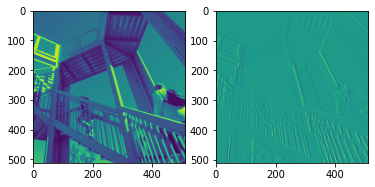

In [37]:
# when working on edge detection, a transition from light to dark will get a negative value
# on the output convolved matrix, whereas a transition from dark to light will get a positive
# value
# If you don't care which direction the transition is in you can just make all values positive


# there are other values you can choose for your convolving matrix
print('eg "Sobel filter" for vertical:')
print(np.array([1, 2, 1, 0, 0, 0, -1, -2, -1]).reshape(3, 3).T)

print('eg "Scharr filter" for vertical:')
print(np.array([3, 10, 3, 0, 0, 0, -3, -10, -3]).reshape(3, 3).T)

# there are others


print('applying convolution: output dimensions are of same shape so not sure its right')
ascent_image = misc.ascent()
vertical_edge_vanilla_convolver = np.array([1, 1, 1, 0, 0, 0, -1, -1, -1]).reshape(3, 3).T

# change mode to output 512*512 image (not losing 2 from each dimensions due to the convolver)
result = signal.convolve2d(ascent_image, vertical_edge_vanilla_convolver, boundary='symm', mode='valid')
# change mode to "same" to add padding of 0s around image and return same dimensions as input
print(result.shape)


# plotting original and convolved image
plt.subplot(1,2,1)    
plt.imshow(ascent_image)
plt.subplot(1,2,2)   
plt.imshow(result)
plt.show()

In [38]:
# can treat the numbers in the convolving matrix as weights to learn, so can find the best
# ones as part of gradient descent
# In doing this it might learn to detect edges at differnt angles and various other things 
# a specified matrix might not get


# to prevent pixels being lost during convolution can pad input matrix, adding a layer of pixels
# around the image, all of value 0
# Could add more pixels worth of padding. 
# "Valid convolution" = no padding
# "Same convolution" = pad so output is same as input size
# 

# convolving matrices tend to be odd numbers of dimensions (3x3, 5x5, etc)



In [40]:
# strided convolution = skipping rows/columns (eg doing every 2) rather than scanning over every single row/column
# 



# can applying conv. to 3d "volumes" (eg: to each 2d image within a "3d" image of 2d images with x3 RGB channels)
# this can involve applying a convolutional cube, rather than a matrix, and getting the total
# across 3 dimensions, eg: a 3*3*3 cube, which moves through a 6*6*3 image, will result in a 
# 4*4 output. 
# Each of the 3 matrices in the cube (on for each RGB matrix) might have different values

# you might do this for a vertical edge detector cube, and a second horizontal edge detector cube, in which
# case you'd run both separately, then stack the results. Eg: 6*6*3 input and 3*3*3 cubes
# would give outputs of dimensions 4*4*2

# the size of the 3rd dimensions is sometimes called 'number of channels' or 'depth'

# Work example on this here:
# https://www.coursera.org/learn/convolutional-neural-networks/lecture/ctQZz/convolutions-over-volume




In [43]:
# 
# after convolving we add a bias term (B) to all numbers in matrix and put through
# activation function (ReLu often)
# Then you stack arrays if you had more than one convolving matrix/cube you applied (if you 
# did this each array outputs have their own Bias and go through their own activation function):
# the stacking only happens after all outputs have been thru activation, at the end of the conv layer
# This completes a convolution layer

# can think of the conv. stage standing in for the WX term in the standard feedforward NN, as it involves
# a transformation of the data and has weights to govern it (just a more complicated transform than the usual FFNN)

# number of parameters in conv. layer is insensitive to size of input image, as it's determined
# by the size and number of convolving matrix/cubes




### notation:
# f[l] = filter size (eg: f[l] = 7 means 7*7 conv matrix)
# p[l] = padding
# s[l] = stride
# n_c = number of channels
# input_image_dimensions = n(height)[l-1] * n(width)[l-1] * n_c  # n_c = no. of channels; 
                    #is n[l-1] as previous layer's output


def get_height_or_width_output(n_previous_layer, padding, filter_size, stride):
    """This func can apply to both width or height of matrix
    Returns dimensions of output layer from input layer
    """
    return ( (n_previous_layer + 2*padding - filter_size)/ stride) + 1


# number of channels in the filter should match number of channels in input (unless it only wants to 
# include some of them and scan over 3 dimensions instead of 2, I suppose - perhaps this is something
# that's done - not sure)


# during training you *might* get a 4d object (effectively an array of 3d arrays, as one 3d array for each data point)

# says there isnt universal convention on the order arrays and channels are stored in in arrays




# for 3d image convolving, this might work:
# scipy.ndimage.convolve()



In [44]:
## in a network of convolutions ('ConvNet', the 3d array of the final convolution can be unravelled
# into a 1d array, which can go into the output layer as it would in a standard NN 
# (eg: neuron with sigmoid/softmax/etc activation)

# in general, tend to start with few channels and larger images, and as you move thru the network
# get more channels of smaller images



## types of layers used in ConvNet:
# convolution (Conv)
# pooling (Pool)
# full connected (FC): same as hidden layer in standard NN


# pooling reduces size of data using some summary func (eg: Max) whch is applied to segments of
# an input image
# eg; a 4x4 image might have max of each 2x2 segment applied to it, outputting a 2x2 matrix - this would
# be max pooling with f=2 and stride=2 (changing both these hyperparameters changes the pooling output)
                #(f and stride refered to as hyperparameters,  they arent learned by gradient descent:
                # you just set them: presumably can learn them as part of the hyperparam search/optimisation)
# so pooling works in a similar way to conv., it just aggregates existing data
# rather than multiplying by a separate array

# max pooling is done on each channel independently, so output has same number of channels as input
# (tho I guess you could always pool across channels too)


# average pooling is also used occassionally, but much less frequently than max pooling

# can pad max pooling, but tend not to

# pooling params:
# f, stride, max/min pooling, padding


# on pooling:
# https://www.coursera.org/learn/convolutional-neural-networks/lecture/hELHk/pooling-layers
        

    



In [48]:

# says when deciding on CNN architecture it can be easier to see what worked for other people on similar 
# tasks and start there. Figuring it out from scratch or some hyperparam search could be a lot harder. 



# example of CNN architecture:
# https://www.coursera.org/learn/convolutional-neural-networks/lecture/uRYL1/cnn-example



# common CNN layer structure:
# conv-pool-conv-pool-FC-FC-softmax (LeNet-5 is one popular example using this structure)
# gradually decrease total datapoints (ie, 'pixels') in each layer 

# most weights re training will come from FC layers, most likely (as they need a weight for each combination
# of input-count and node-count)





### two features of convolutions:
# parameter sharing = where a feature detector used in one part of the image can be used in another part
        # of the image too (so only need to train one convolution matrix)
        # This means we can train far fewer weights, as we do for a conv layer vs an FC layer
# sparsity of connections: in each layer, each output value depends only on a small number of inputs    



# to get a detected object's position in the image, might want to do something like a regression
# to predict the object's bounding box (this seems like a thing one could train)


